<a href="https://colab.research.google.com/github/tkavya-05/21311A05A4/blob/master/next%20word%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install keras_tuner
!pip install tensorflow
!pip install keras
!pip install sklearn
!pip install pandas
!pip install numpy
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.9 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout
import matplotlib.pyplot as plt

In [6]:
def load_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()
    return text
mytext = load_text_file("dataset-nwp.txt")

In [7]:
mytokenizer = Tokenizer()
mytokenizer.fit_on_texts([mytext])
total_words = len(mytokenizer.word_index) + 1


In [8]:
my_input_sequences = []

In [9]:
for line in mytext.split('\n'):
    token_list = mytokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        my_n_gram_sequence = token_list[:i+1]
        my_input_sequences.append(my_n_gram_sequence)

In [10]:
max_sequence_len = max([len(seq) for seq in my_input_sequences])
input_sequences = np.array(pad_sequences(my_input_sequences, maxlen=max_sequence_len, padding='pre'))
X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))


In [12]:
max_sequence_length=20

In [13]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dropout(0.2))
model.add(Dense(150, activation='relu'))
model.add(Dense(total_words, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 8s 14ms/step - accuracy: 0.0371 - loss: 6.2479
Epoch 2/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0409 - loss: 5.7824
Epoch 3/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0617 - loss: 5.6402
Epoch 4/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0592 - loss: 5.6498
Epoch 5/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0671 - loss: 5.5266
Epoch 6/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.0597 - loss: 5.3937
Epoch 7/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0595 - loss: 5.2370
Epoch 8/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.0811 - loss: 5.0102
Epoch 9/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.0845 - loss: 4.7957
Epoch 10/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1006 - loss: 4.5627
Epoch 11/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1185 - loss: 4.3540
Epoch 12/100
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

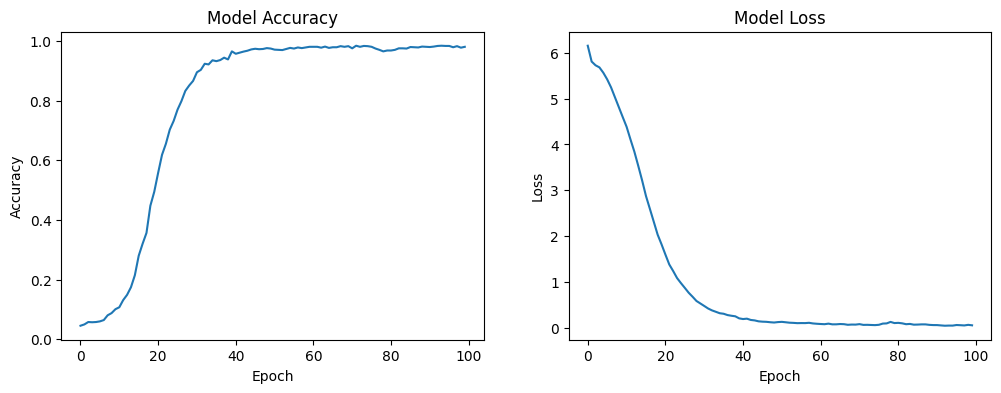

In [16]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

plt.show()

In [17]:
input_text = "Joe biden"
predict_next_words = 6

for _ in range(predict_next_words):
    token_list = mytokenizer.texts_to_sequences([input_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in mytokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    input_text += " " + output_word

print(input_text)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Joe biden and first lady jill biden welcome
